In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from google.colab import files
uploaded = files.upload()


Saving house-prices-advanced-regression-techniques.zip to house-prices-advanced-regression-techniques.zip


In [3]:
import zipfile
import os

with zipfile.ZipFile("house-prices-advanced-regression-techniques.zip", 'r') as zip_ref:
    zip_ref.extractall("house_data")


In [4]:
import pandas as pd

train_df = pd.read_csv("house_data/train.csv")
test_df = pd.read_csv("house_data/test.csv")

train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(train_df.shape)
print(train_df.info())
train_df.describe()

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df.isnull().sum().sort_values(ascending=False).head(20)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [25]:

threshold = 0.4
train_df = train_df.dropna(thresh=int((1 - threshold) * len(train_df)), axis=1)


numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df.loc[:, numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())


categorical_cols = train_df.select_dtypes(include='object').columns


for col in categorical_cols:
    if not train_df[col].mode().empty:
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)


In [16]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 269 entries, MSSubClass to HouseAge
dtypes: bool(230), float64(3), int64(36)
memory usage: 772.9 KB


In [28]:
train_df.drop(['Id'], axis=1, inplace=True, errors='ignore')


In [17]:
print("'Id' dropped. Current shape:", train_df.shape)

'Id' dropped. Current shape: (1460, 269)


In [36]:
train_df = pd.get_dummies(train_df)

In [18]:
print("After one-hot encoding:", train_df.shape)
train_df.head()

After one-hot encoding: (1460, 269)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalSF,HouseAge
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,True,False,False,False,False,True,False,2566,5
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,True,False,False,False,False,True,False,2524,31
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,True,False,False,False,False,True,False,2706,7
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,True,True,False,False,False,False,False,2473,91
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,True,False,False,False,False,True,False,3343,8


In [35]:

train_df["TotalSF"] = train_df["TotalBsmtSF"] + train_df["1stFlrSF"] + train_df["2ndFlrSF"]


train_df["HouseAge"] = train_df["YrSold"] - train_df["YearBuilt"]

In [19]:
print("Added 'TotalSF' and 'HouseAge' columns")
train_df[["TotalSF", "HouseAge"]].head()


Added 'TotalSF' and 'HouseAge' columns


,TotalSF,HouseAge
0,2566,5
1,2524,31
2,2706,7
3,2473,91
4,3343,8


<Axes: xlabel='SalePrice', ylabel='Count'>

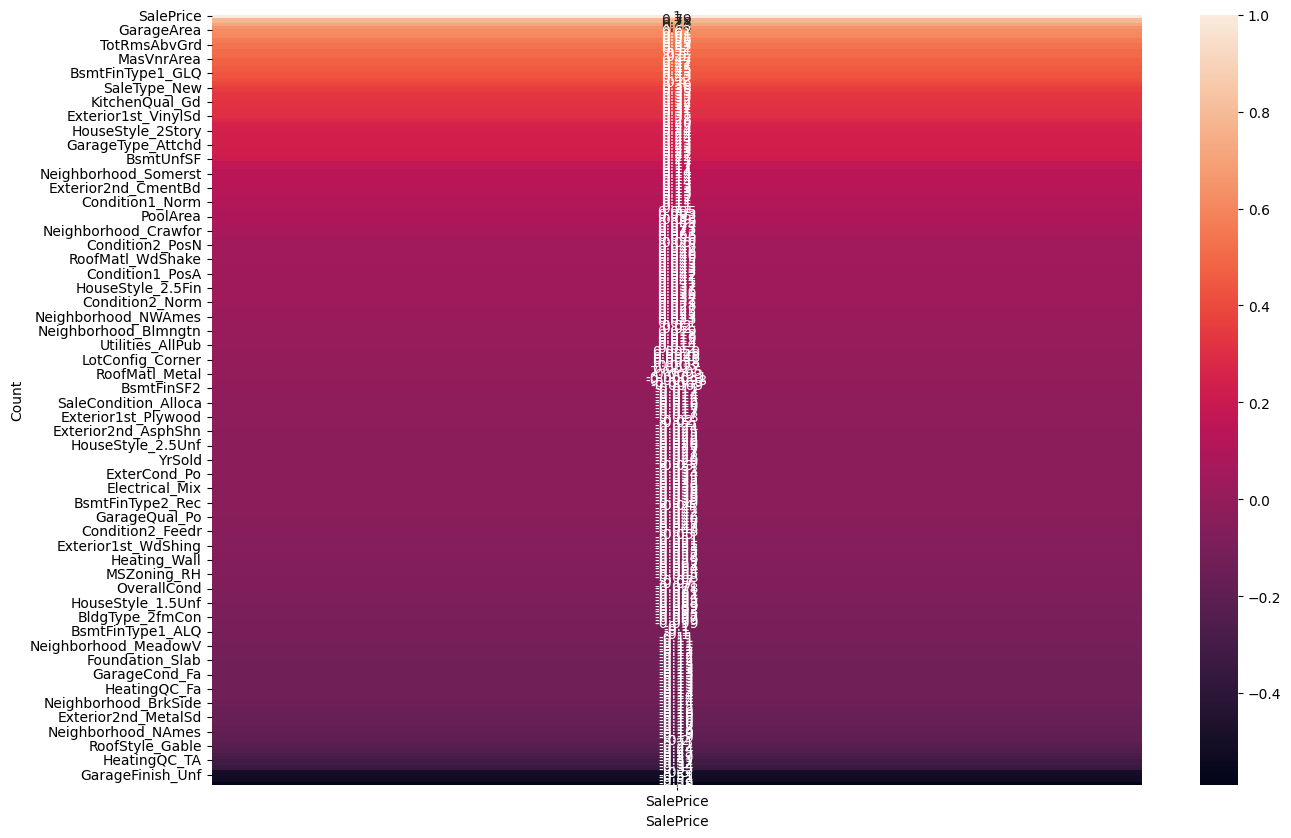

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True)


sns.histplot(train_df['SalePrice'], kde=True)


In [31]:
from sklearn.preprocessing import StandardScaler

X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


print("Scaled X shape:", X_scaled.shape)


Scaled X shape: (1460, 268)


In [33]:
processed_df = pd.DataFrame(X_scaled, columns=X.columns)
processed_df["SalePrice"] = y.values


display(processed_df.head())


processed_df.to_csv("processed_house_data.csv", index=False)



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalSF,HouseAge,SalePrice
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,-0.001277,-1.043259,208500
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,-0.052407,-0.183465,181500
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,0.169157,-0.977121,223500
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995,-0.114493,1.800676,140000
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,0.944631,-0.944052,250000
